# Week 3 Project: Time Series Analysis

## 🎯 Project Goal
Perform comprehensive time series analysis on stock returns.

## Skills Applied
- Stationarity testing (ADF)
- Autocorrelation analysis
- ARIMA modeling
- Volatility clustering

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
np.random.seed(42)

print("="*70)
print("WEEK 3 PROJECT: TIME SERIES ANALYSIS")
print("="*70)

WEEK 3 PROJECT: TIME SERIES ANALYSIS


In [2]:
# Download data
TICKERS = ['AAPL', 'GOOGL', 'MSFT', 'GS', 'JPM']
end_date = datetime.now()
start_date = end_date - timedelta(days=3*365)

prices = yf.download(TICKERS, start=start_date, end=end_date, progress=False, auto_adjust=True)['Close']
returns = prices.pct_change().dropna()

print(f"✅ Data: {len(returns)} trading days")

✅ Data: 751 trading days


In [3]:
# Stationarity Tests
print("\n" + "="*60)
print("STATIONARITY TESTS (Augmented Dickey-Fuller)")
print("="*60)

print("\nPrices (expected: non-stationary):")
for stock in TICKERS:
    adf_stat, adf_pval, _, _, _, _ = adfuller(prices[stock].dropna())
    result = "Stationary" if adf_pval < 0.05 else "Non-Stationary"
    print(f"  {stock}: ADF={adf_stat:.2f}, p={adf_pval:.4f} -> {result}")

print("\nReturns (expected: stationary):")
for stock in TICKERS:
    adf_stat, adf_pval, _, _, _, _ = adfuller(returns[stock].dropna())
    result = "✅ Stationary" if adf_pval < 0.05 else "❌ Non-Stationary"
    print(f"  {stock}: ADF={adf_stat:.2f}, p={adf_pval:.4f} -> {result}")


STATIONARITY TESTS (Augmented Dickey-Fuller)

Prices (expected: non-stationary):
  AAPL: ADF=-1.81, p=0.3770 -> Non-Stationary
  GOOGL: ADF=1.27, p=0.9964 -> Non-Stationary
  MSFT: ADF=-2.10, p=0.2434 -> Non-Stationary
  GS: ADF=0.96, p=0.9939 -> Non-Stationary
  JPM: ADF=-0.51, p=0.8909 -> Non-Stationary

Returns (expected: stationary):
  AAPL: ADF=-13.94, p=0.0000 -> ✅ Stationary
  GOOGL: ADF=-16.51, p=0.0000 -> ✅ Stationary
  MSFT: ADF=-27.76, p=0.0000 -> ✅ Stationary
  GS: ADF=-26.32, p=0.0000 -> ✅ Stationary
  JPM: ADF=-16.43, p=0.0000 -> ✅ Stationary


In [4]:
# Autocorrelation Analysis
print("\n" + "="*60)
print("AUTOCORRELATION ANALYSIS")
print("="*60)

# Select AAPL for detailed analysis
stock = 'AAPL'
ret = returns[stock]

# Calculate ACF and PACF
acf_vals = acf(ret, nlags=20)
pacf_vals = pacf(ret, nlags=20)

# Squared returns (volatility clustering)
squared_ret = ret ** 2
acf_sq = acf(squared_ret, nlags=20)

print(f"\n{stock} Returns:")
print(f"  Lag-1 ACF: {acf_vals[1]:.4f}")
print(f"  Lag-1 PACF: {pacf_vals[1]:.4f}")
print(f"\n{stock} Squared Returns (Volatility):")
print(f"  Lag-1 ACF: {acf_sq[1]:.4f}")
print(f"  Lag-5 ACF: {acf_sq[5]:.4f}")
print(f"\n📊 Volatility clustering detected: {acf_sq[1] > 0.1}")


AUTOCORRELATION ANALYSIS

AAPL Returns:
  Lag-1 ACF: 0.0546
  Lag-1 PACF: 0.0547

AAPL Squared Returns (Volatility):
  Lag-1 ACF: 0.1946
  Lag-5 ACF: 0.0606

📊 Volatility clustering detected: True


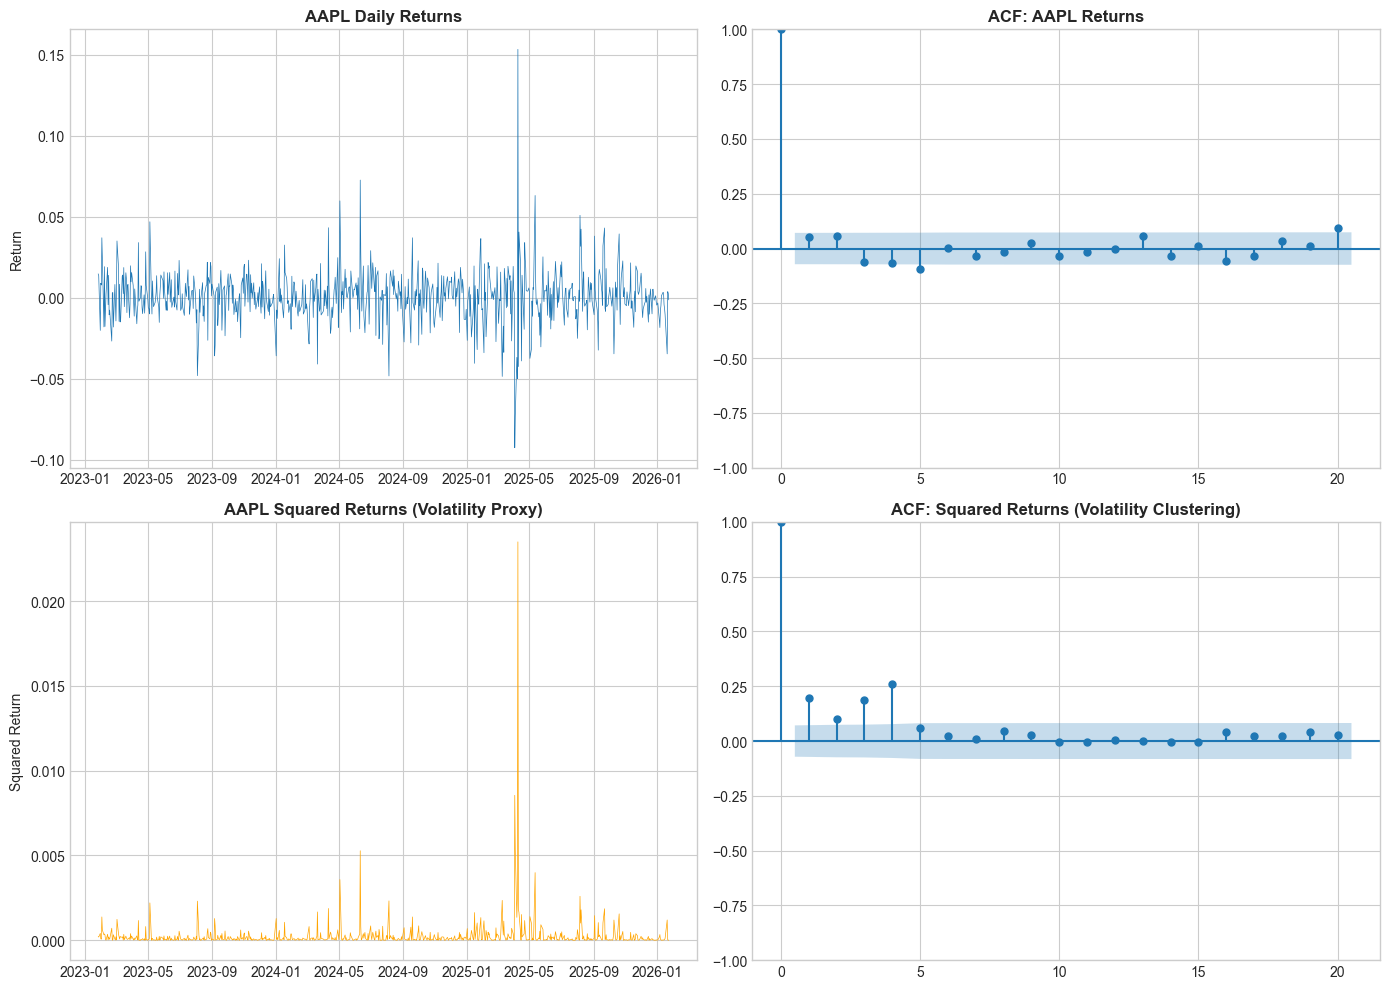


✅ Week 3 Project Complete!


In [5]:
# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Returns time series
ax1 = axes[0, 0]
ax1.plot(returns.index, returns['AAPL'], linewidth=0.5)
ax1.set_title('AAPL Daily Returns', fontweight='bold')
ax1.set_ylabel('Return')

# ACF of returns
ax2 = axes[0, 1]
plot_acf(returns['AAPL'], ax=ax2, lags=20, alpha=0.05)
ax2.set_title('ACF: AAPL Returns', fontweight='bold')

# Squared returns (volatility)
ax3 = axes[1, 0]
ax3.plot(returns.index, returns['AAPL']**2, linewidth=0.5, color='orange')
ax3.set_title('AAPL Squared Returns (Volatility Proxy)', fontweight='bold')
ax3.set_ylabel('Squared Return')

# ACF of squared returns
ax4 = axes[1, 1]
plot_acf(returns['AAPL']**2, ax=ax4, lags=20, alpha=0.05)
ax4.set_title('ACF: Squared Returns (Volatility Clustering)', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Week 3 Project Complete!")